In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [3]:
train.head();

<Axes: >

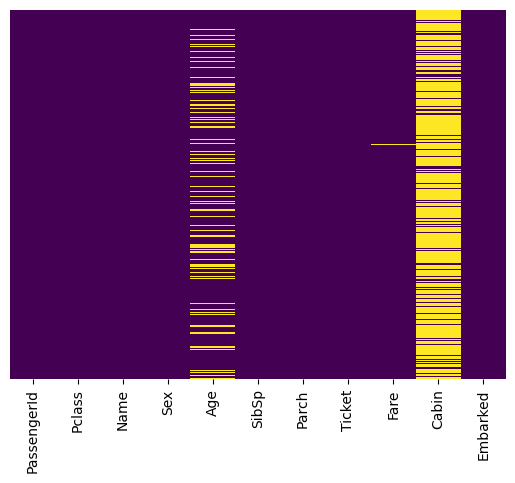

In [4]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

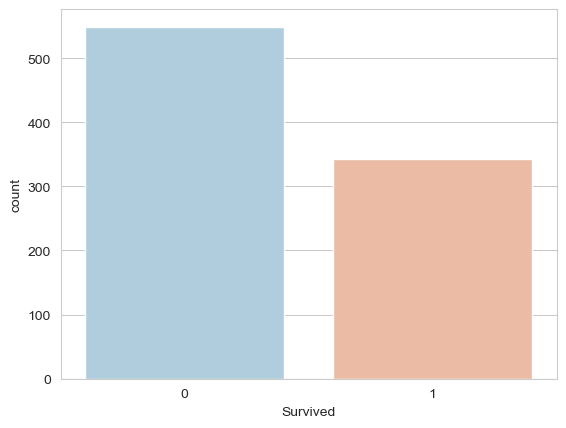

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

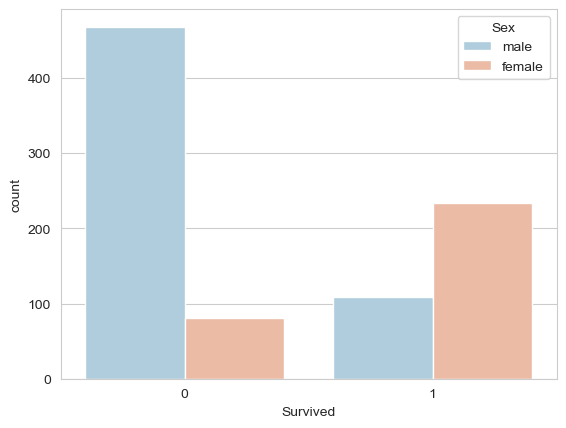

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Pclass', ylabel='Age'>

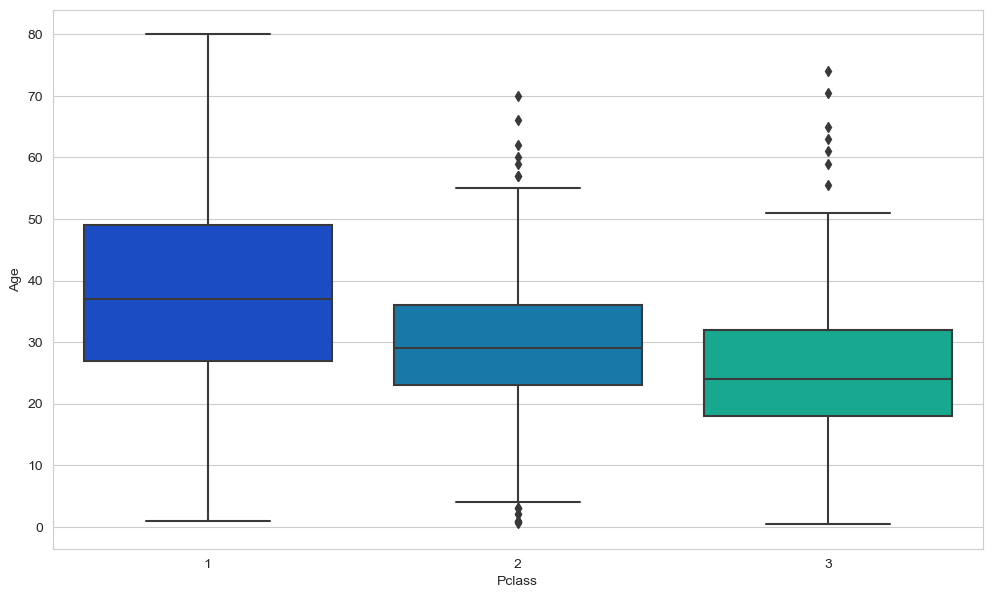

In [7]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [8]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [9]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

<Axes: >

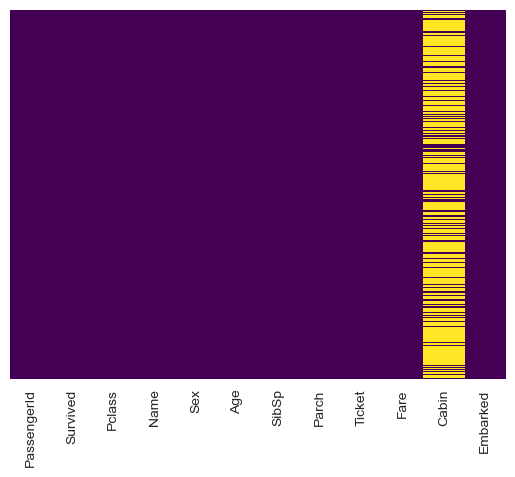

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [13]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [24]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [46]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    for _ in range(num_iters):
        grad0 = 0
        grad1 = 0
        for i in range(m):
            h = sigmoid(np.dot(X[i], theta))
            grad0 += (h - y[i]) * X[i][0]
            grad1 += (h - y[i]) * X[i][1]        
        theta[0] -= alpha * grad0 / m
        theta[1] -= alpha * grad1 / m
    return theta

In [47]:
def predict(X, theta):
    predictions = []
    for i in range(len(X)):
        probability = sigmoid(np.dot(X[i], theta))
        if probability >= 0.5:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [53]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.20, random_state=101)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
theta = np.zeros((X_train_scaled.shape[1], 1))
theta = gradient_descent(X_train_scaled.tolist(), y_train.tolist(), theta.tolist(), .01, 1000)

In [54]:
train_predictions = predict(X_train_scaled, theta)
test_predictions = predict(X_test_scaled, theta)

In [56]:
from sklearn.metrics import classification_report, accuracy_score
print("Training Classification Report:")
print(classification_report(y_train, train_predictions))
print("Training Accuracy:", accuracy_score(y_train, train_predictions))

print("\nTest Classification Report:")
print(classification_report(y_test, test_predictions))
print("Test Accuracy:", accuracy_score(y_test, test_predictions))

Training Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       442
           1       0.54      0.64      0.59       269

    accuracy                           0.66       711
   macro avg       0.65      0.66      0.65       711
weighted avg       0.67      0.66      0.66       711

Training Accuracy: 0.659634317862166

Test Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.74       107
           1       0.60      0.69      0.64        71

    accuracy                           0.70       178
   macro avg       0.69      0.70      0.69       178
weighted avg       0.71      0.70      0.70       178

Test Accuracy: 0.6966292134831461
